 **Project Title:** *Multi-Feature Content Modeling for Book Recommendations*  
This project investigates how various book attributes — specifically genre, author, and title — can be combined and modeled using text-based feature engineering techniques such as TF-IDF and dimensionality reduction. The core research question centers around building an effective content-based recommendation system that can generate relevant book suggestions based solely on these content features.

Group 29 - Saafiya, Mayuri, Greeshma, Ishika

## ***Data Cleaning Summary***

The raw dataset contained inconsistencies such as missing values, malformed text, and non-standard formats. To ensure data quality for downstream modeling, the following cleaning steps were applied:

1. **Invalid and Missing Entries:** Rows with missing or invalid values in key columns (`genres`, `name`, `summary`, `author`, `star_rating`, and `first_published`) were removed.
2. **String Evaluation:** The `genres` and `author` fields, often stored as stringified lists, were safely parsed using `ast.literal_eval` while handling exceptions.
3. **Textual Noise Removal:** Fields containing placeholder strings like `\\N` or empty values were filtered out.
4. **Type Conversion:**
   - `star_rating` was converted to a numeric format and cleaned of non-numeric values.
   - `first_published` was converted to datetime format and reduced to its year for temporal consistency.
5. **Genre Standardization:** The genre list was flattened into a readable comma-separated string to maintain clarity in text-based modeling.
6. **Final Validation:** The dataset was filtered to retain only rows with all essential information present and was saved as a new clean CSV for further analysis.

This preprocessing ensures a reliable and structured dataset for developing an effective content-based recommendation system.


In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [15]:
# Define the file paths
file_path = "/content/0000-2.csv"
output_file_path = "/content/drive/MyDrive/cle.csv"

In [3]:
# Load dataset
df = pd.read_csv(file_path, on_bad_lines='skip', engine='c', encoding='latin-1')

In [4]:
df.head()

,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price
0,https://www.goodreads.com/book/show/1047836.Ho...,1047836.Horror_Film_Directors_1931_1990,"Horror Film Directors, 1931-1990","[""Dennis Fischer""]",4.29,7,\N,An exhaustive study of the major directors of ...,\N,11/1/1991,"{""name"":""Dennis Fischer"",""num_books"":14}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",\N
1,https://www.goodreads.com/book/show/4089333-au...,4089333-australian-urban-planning,"Australian Urban Planning: New Challenges, New...","[""Brendan Gleeson""]",3.00,1,\N,"Designed for use by academics, students, plann...",\N,2/1/2000,"{""name"":""Brendan Gleeson"",""num_books"":28}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",\N
2,https://www.goodreads.com/book/show/26764878-m...,26764878-morgen-ohne-gestern,Morgen ohne gestern: Roman,"[""Regina NÃ¶ssler""]",3.00,2,\N,Christine Hoffmann wacht eines Morgens im Kran...,\N,9/18/2015,"{""name"":""Regina NÃ¶ssler"",""num_books"":28,""num_...","{""1_stars"":{""reviews_num"":1,""reviews_percentag...","""$10.89"""
3,https://www.goodreads.com/book/show/23656944-z...,23656944-zen-and-the-art-of-recording,Zen and the Art of Recording,"[""Mixerman""]",4.19,88,4,"In this book, the third in the Zen and the Art...","[""Music"",""Nonfiction""]",10/1/2014,"{""name"":""Mixerman"",""num_books"":15,""num_followe...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$24.09"""
4,https://www.goodreads.com/book/show/26761586-t...,26761586-the-big-book-of-codewords,The Big Book Of Codewords,"[""Parragon Books""]",4.50,6,\N,500 codeword puzzles in one great book!,\N,9/5/2015,"{""name"":""Parragon Books"",""num_books"":6068,""num...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",\N


In [5]:
# Safe literal evaluation for 'genres', 'author', and 'summary'
def safe_literal_eval(x):
    try:
        if isinstance(x, str) and x != '\\N' and x.strip():
            return ast.literal_eval(x)
        else:
            return []
    except (ValueError, SyntaxError):
        return []

In [6]:
# Clean 'genres', 'author', 'name', and 'summary' to remove any invalid entries (such as '\N' or empty strings)
df['genres'] = df['genres'].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else [])
df['author'] = df['author'].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else [])
df['name'] = df['name'].apply(lambda x: x if isinstance(x, str) and x.strip() != '\\N' else np.nan)
df['summary'] = df['summary'].apply(lambda x: x if isinstance(x, str) and x.strip() != '\\N' else np.nan)

In [7]:
# Drop rows where 'name' or 'summary' is NaN after cleaning
df.dropna(subset=['name', 'summary'], inplace=True)

In [8]:
# Clean 'star_rating' to ensure it's a valid numeric value
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
df.dropna(subset=['star_rating'], inplace=True)  # Drop rows where 'star_rating' is NaN after conversion

In [9]:
# Clean 'first_published' to ensure it's a valid date and extract the year
df['first_published'] = pd.to_datetime(df['first_published'], errors='coerce')
df.dropna(subset=['first_published'], inplace=True)  # Drop rows with invalid 'first_published'
df['first_published_year'] = df['first_published'].dt.year

In [10]:
# Convert 'genres' list to a comma-separated string
df['genres'] = df['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

In [11]:
# Remove rows where 'genres' is empty, NaN, or contains the value '\N'
df = df[df['genres'].notna() & (df['genres'] != '') & (df['genres'] != '\\N')]

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Save the cleaned dataset to a new CSV file
df.to_csv(output_file_path, index=False)

In [17]:
# Show the first 10 rows of the cleaned DataFrame
print("First 10 rows of the cleaned dataset:")
print(df.head(10))

First 10 rows of the cleaned dataset:
                                                  url  \
3   https://www.goodreads.com/book/show/23656944-z...   
8   https://www.goodreads.com/book/show/4103828-om...   
9   https://www.goodreads.com/book/show/317587.Qui...   
14  https://www.goodreads.com/book/show/318028.Il_...   
18  https://www.goodreads.com/book/show/6590893-ve...   
19  https://www.goodreads.com/book/show/313435.Sam...   
25  https://www.goodreads.com/book/show/310054.Fin...   
29  https://www.goodreads.com/book/show/485618.Chi...   
31  https://www.goodreads.com/book/show/13633706-g...   
32  https://www.goodreads.com/book/show/8659397-bu...   

                                       id  \
3   23656944-zen-and-the-art-of-recording   
8               4103828-oman-under-qaboos   
9   317587.Quilts_From_Lavender_Hill_Farm   
14                      318028.Il_Gigante   
18           6590893-verzamelde-gedichten   
19        313435.Sam_Saboura_s_Real_Style   
25                 

In [18]:
# Show the number of entries left after the cleaning process
num_entries_left = len(df)
print(f"Number of entries left after cleaning: {num_entries_left}")

Number of entries left after cleaning: 101593


In [19]:
print(f"Cleaned dataset saved to {output_file_path}")

Cleaned dataset saved to /content/drive/MyDrive/cle.csv


In [20]:
# importing the cleaned dataset as df
df = pd.read_csv('/content/cle.csv')

In [21]:
df.head()

,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price,first_published_year
0,https://www.goodreads.com/book/show/23656944-z...,23656944-zen-and-the-art-of-recording,Zen and the Art of Recording,['Mixerman'],4.19,88,4,"In this book, the third in the Zen and the Art...","Music, Nonfiction",2014-10-01,"{""name"":""Mixerman"",""num_books"":15,""num_followe...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$24.09""",2014
1,https://www.goodreads.com/book/show/4103828-om...,4103828-oman-under-qaboos,Oman Under Qaboos,['Calvin H. Allen'],3.56,9,\N,"This is an examination of the political, econo...",History,2000-03-30,"{""name"":""Calvin H. Allen"",""num_books"":4}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$78.84""",2000
2,https://www.goodreads.com/book/show/317587.Qui...,317587.Quilts_From_Lavender_Hill_Farm,Quilts From Lavender Hill Farm: 12 Projects In...,['Darlene Zimmerman'],3.20,5,\N,Bring a Touch of the Country Into Your Home In...,Quilting,2007-04-30,"{""name"":""Darlene Zimmerman"",""num_books"":23,""nu...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$22.99""",2007
3,https://www.goodreads.com/book/show/318028.Il_...,318028.Il_Gigante,"Il Gigante: Michelangelo, Florence, and the Da...",['Anton Gill'],3.46,85,12,"At the turn of the 16th century, Italy was a t...","Art, History, Art History, Italy, Biography, N...",2002-01-28,"{""name"":""Anton Gill"",""num_books"":57,""num_follo...","{""1_stars"":{""reviews_num"":2,""reviews_percentag...","""$11.99""",2002
4,https://www.goodreads.com/book/show/6590893-ve...,6590893-verzamelde-gedichten,Verzamelde Gedichten,"[""Jotie T'Hooft""]",4.48,21,\N,Dutch,Poetry,1981-01-01,"{""name"":""Jotie T'Hooft"",""num_books"":16,""num_fo...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",\N,1981


## ***Visualisations***


In [23]:
df.dtypes

,0
url,object
id,object
name,object
author,object
star_rating,float64
num_ratings,int64
num_reviews,object
summary,object
genres,object
first_published,object


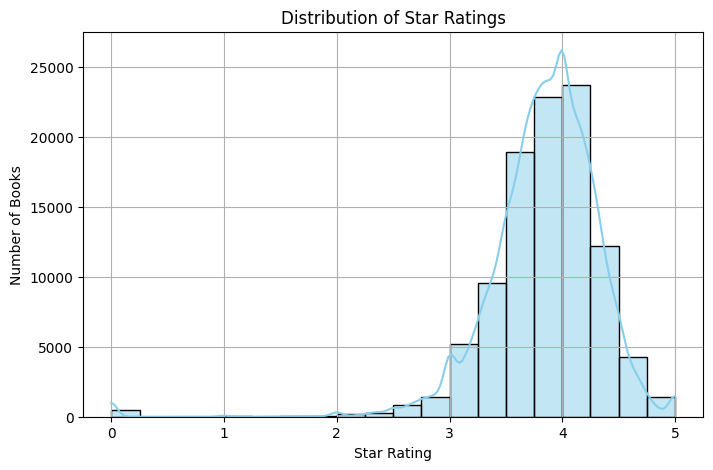

In [24]:
# Distribution of Star Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['star_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

<ipython-input-26-79de68f13275>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='decade', palette='viridis')


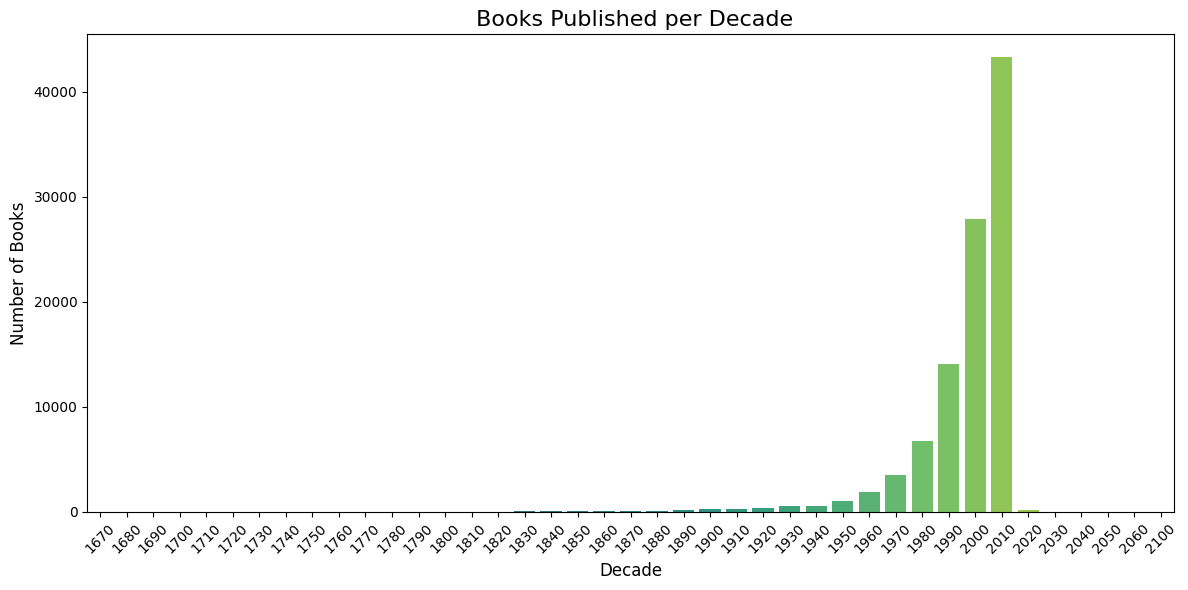

In [26]:
# Number of Books Published by Decade

# Rounding the year to the nearest decade
df['decade'] = (df['first_published_year'] // 10) * 10

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='decade', palette='viridis')
plt.title(' Books Published per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-27-0f11c7ec4364>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='viridis')


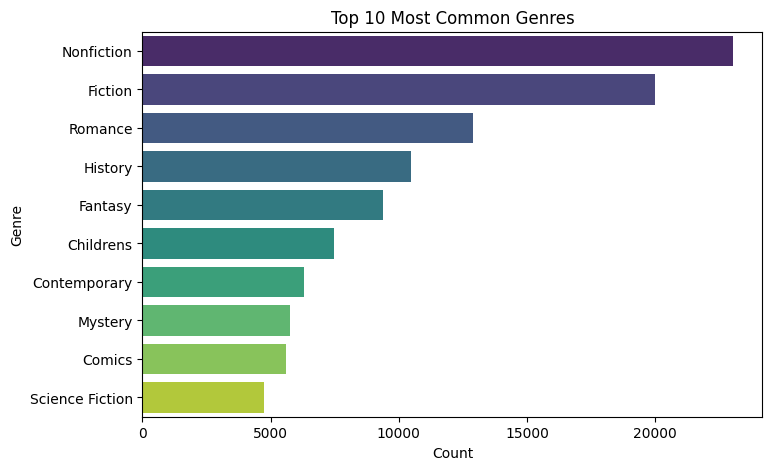

In [27]:
# Top 10 Most Common Genres
genre_series = df['genres'].str.split(', ')
genre_counts = Counter([g for sublist in genre_series for g in sublist])
top_genres = dict(genre_counts.most_common(10))

plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<ipython-input-28-76ae68141262>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_authors.values()), y=list(top_authors.keys()), palette='magma')


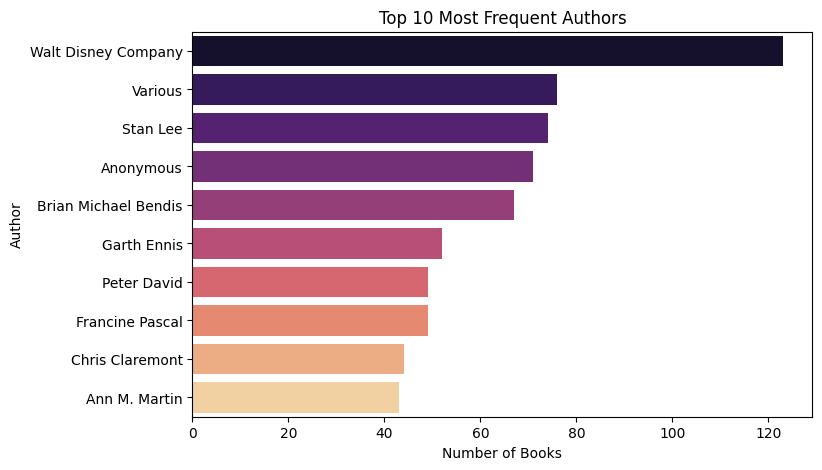

In [28]:
#  Top 10 Most Frequent Authors
author_series = df['author'].apply(lambda x: eval(x) if isinstance(x, str) else [])
author_counts = Counter([a for sublist in author_series for a in sublist])
top_authors = dict(author_counts.most_common(10))

plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_authors.values()), y=list(top_authors.keys()), palette='magma')
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

<ipython-input-29-d86e6f71185a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_genres, x='genres', y='star_rating', palette='Set2')


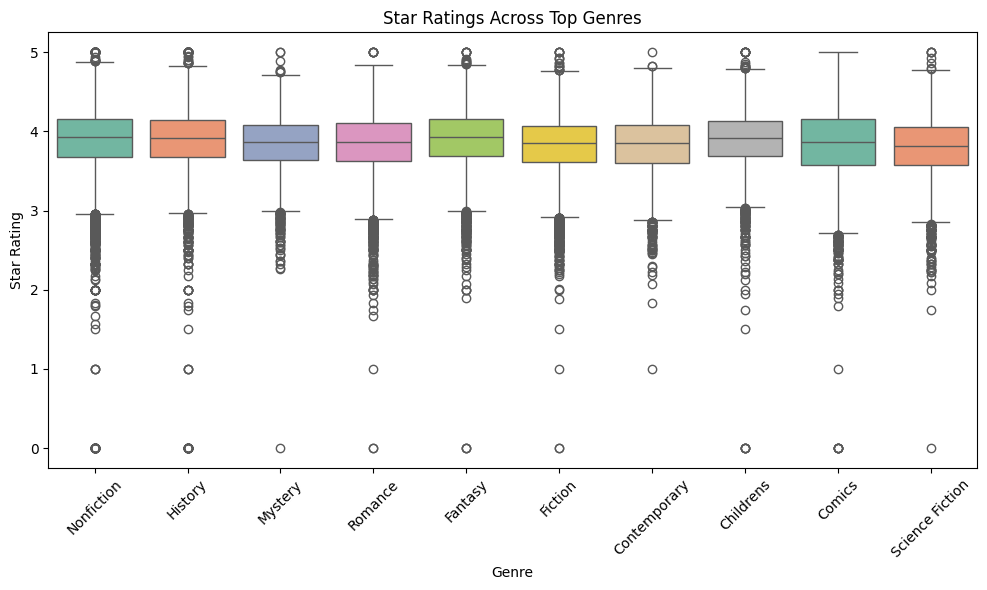

In [29]:
# Star Ratings Across Top Genres (Box Plot)
df_genres_flat = df.copy()
df_genres_flat['genres'] = df_genres_flat['genres'].str.split(', ')
df_genres_flat = df_genres_flat.explode('genres')

top_genres_list = list(top_genres.keys())
df_top_genres = df_genres_flat[df_genres_flat['genres'].isin(top_genres_list)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_genres, x='genres', y='star_rating', palette='Set2')
plt.title('Star Ratings Across Top Genres')
plt.xlabel('Genre')
plt.ylabel('Star Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-30-1ca23fa8c68d>:21: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


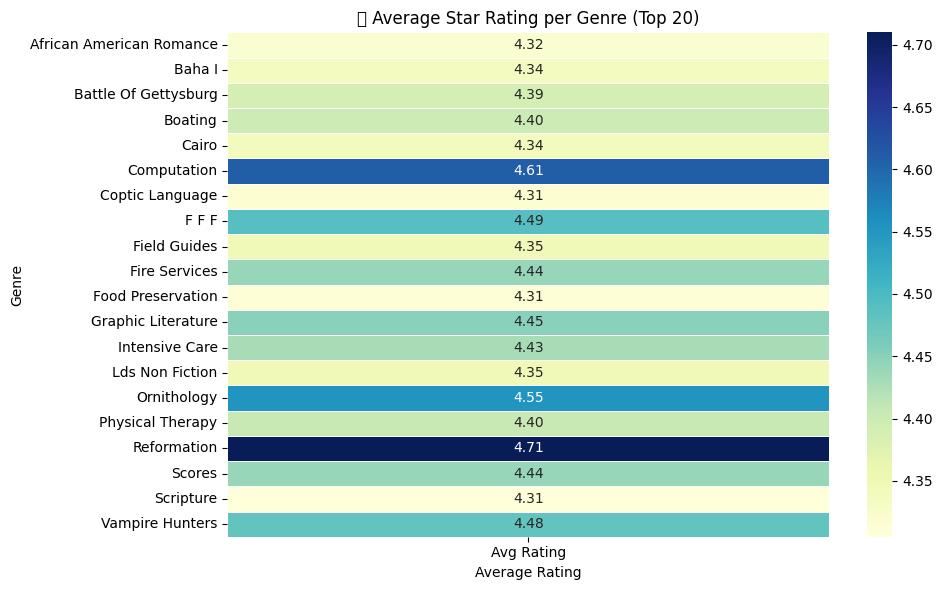

In [30]:
# Heatmap of Average Star Ratings by Genre

# Prepare data: explode genres to associate each book with individual genres
df_genres_exp = df.copy()
df_genres_exp['genres'] = df_genres_exp['genres'].str.split(', ')
df_genres_exp = df_genres_exp.explode('genres')

# Calculate average star rating per genre
genre_rating_pivot = df_genres_exp.groupby('genres')['star_rating'].mean().sort_values(ascending=False).head(20)

# Convert to DataFrame for heatmap
genre_rating_df = genre_rating_pivot.reset_index().rename(columns={'genres': 'Genre', 'star_rating': 'Avg Rating'})

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_rating_df.pivot_table(index='Genre', values='Avg Rating'),
            annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)
plt.title('🔥 Average Star Rating per Genre (Top 20)')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

##***SVD***
This is a content-based book recommendation model using TF-IDF and dimensionality reduction with SVD. It also includes genre normalization and fuzzy title matching to improve recommendation quality and relevance.


In [2]:
!pip install fuzzywuzzy
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
import ipywidgets as widgets
from IPython.display import display, Markdown
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import shuffle
from fuzzywuzzy import process
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
# Loading the clean dataset
df = pd.read_csv('/content/cle.csv')

In [5]:
# Data Preprocessing
df = df.dropna(subset=['name', 'author', 'genres'])
df = df.sample(300, random_state=42).reset_index(drop=True)
df['combined_features'] = df['name'] + ' ' + df['author'] + ' ' + df['genres']

In [6]:
# Combining only 'name' and 'genres'
df['combined_features'] = df['name'].fillna('') + ' ' + df['genres'].fillna('')

In [7]:
# Sample 1000 rows for speed
df_sample = shuffle(df, random_state=42).head(1000).copy()

In [8]:
# TF-IDF + SVD
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_sample['combined_features'])

svd = TruncatedSVD(n_components=50, random_state=42)
svd_matrix = svd.fit_transform(tfidf_matrix)
df_sample['svd_vector'] = list(svd_matrix)

In [9]:
#Genre parsing + normalization
genre_mapping = {
    'historical fiction': 'fiction',
    'literary fiction': 'fiction',
    'adult fiction': 'fiction',
    'nonfiction': 'non-fiction',
    'biography': 'non-fiction',
    'memoir': 'non-fiction',
    'christian non fiction': 'non-fiction',
    'academic': 'non-fiction',
    'philosophy': 'non-fiction',
    'finance': 'non-fiction',
    'thriller': 'fiction',
    'suspense': 'fiction',
    'textbooks': 'non-fiction',
    'political science': 'politics',
    'canadian literature': 'fiction',
}
def parse_genres(genre_str):
    return [g.strip().lower() for g in genre_str.split(',')] if isinstance(genre_str, str) else []

def normalize_genres(genre_list):
    normalized = set()
    for g in genre_list:
        core = genre_mapping.get(g.lower(), g.lower())
        normalized.add(core)
    return list(normalized)

df_sample['genre_list'] = df_sample['genres'].apply(parse_genres).apply(normalize_genres)

In [10]:
# Recommendation Function with F1 Score
def recommend_books(input_title, top_n=10):
    matched = process.extractOne(input_title, df_sample['name'], score_cutoff=60)

    if not matched:
        print(" No close match found.")
        return

    matched_title = matched[0]
    print(f" Best match found: {matched_title}")

    match_row = df_sample[df_sample['name'] == matched_title]
    if match_row.empty:
        print(" Matched title not found in sample.")
        return

    query_idx = match_row.index[0]
    query_pos = df_sample.index.get_loc(query_idx)

    query_vector = np.array(df_sample.iloc[query_pos]['svd_vector']).reshape(1, -1)
    query_genres = set(df_sample.iloc[query_pos]['genre_list'])

    scores = cosine_similarity(query_vector, svd_matrix).flatten()
    scores[query_pos] = -1  # Exclude self

    top_indices = scores.argsort()[::-1][:top_n]

    print(f"\n Query Book: {matched_title}")
    print(f" Genres: {query_genres}")
    print("\n Top Recommendations:")

    relevant = []
    for i, idx in enumerate(top_indices, 1):
        rec_title = df_sample.iloc[idx]['name']
        rec_genres = set(df_sample.iloc[idx]['genre_list'])
        is_relevant = bool(query_genres & rec_genres)
        relevant.append(1 if is_relevant else 0)
        mark = "Good :) " if is_relevant else "Try Again :()"
        print(f"{i}. {rec_title} ({', '.join(rec_genres)}) {mark}")

    precision = sum(relevant) / top_n
    total_relevant = sum(1 for genres in df_sample['genre_list'] if query_genres & set(genres))
    recall = sum(relevant) / total_relevant if total_relevant > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\n Precision@{top_n}: {precision:.2f}")
    print(f" Recall@{top_n}: {recall:.2f}")
    print(f" F1 Score@{top_n}: {f1_score:.2f}")

# Optional: Evaluate model performance over multiple samples
def evaluate_model(model_matrix, df_sample, top_n=10, sample_size=100):
    from random import sample
    total_precision, total_recall, total_f1 = 0, 0, 0

    sampled_indices = sample(range(len(df_sample)), min(sample_size, len(df_sample)))

    for idx in sampled_indices:
        query_vector = np.array(df_sample.iloc[idx]['svd_vector']).reshape(1, -1)
        query_genres = set(df_sample.iloc[idx]['genre_list'])

        if not query_genres:
            continue  # skip if genres are empty

        scores = cosine_similarity(query_vector, model_matrix).flatten()

In [11]:
# Run the recommendation system
book_name = input(" Enter the name of the book you want recommendations for: ")
recommend_books(book_name, top_n=10)
evaluate_model(svd_matrix, df_sample, top_n=10, sample_size=100)

 Enter the name of the book you want recommendations for: Servamp 7
 Best match found: Servamp 7

 Query Book: Servamp 7
 Genres: {'manga', 'fantasy', 'vampires'}

 Top Recommendations:
1. Nido di vespe (manga) Good :) 
2. Bloodforged (dark fantasy, fantasy, fiction, vampires) Good :) 
3. Il fiume Shinano 2 (manga, seinen) Good :) 
4. ãããã¯çæï¼ï¼ï¼ (ããã°ã³ããã¯ã¹) (manga) Good :) 
5. æ°ããã¹ã®çå­æ§ 17 [Shin Tennis no Åjisama 17] (manga) Good :) 
6. TrÃ¤nenschloss (Fesseln der Dunkelheit 3) (paranormal, fantasy, vampires) Good :) 
7. Papavera - Der Ring des Kreuzritters (fantasy) Good :) 
8. Smirt (fantasy) Good :) 
9. Elvangar (fantasy) Good :) 
10. Seed (fantasy) Good :) 

 Precision@10: 1.00
 Recall@10: 0.29
 F1 Score@10: 0.44


## ***KNN + TF-IDF***
This model recommends books based on a user's input title by analyzing book content features (genres, summary, author, and publication year) using TF-IDF and a K-Nearest Neighbors algorithm. It evaluates recommendations using precision and recall to match similar genres.

In [12]:
import pandas as pd
import numpy as np
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [13]:
# Load and preprocess the dataset
def load_and_preprocess_data(file_path):
    df = pd.read_csv("/content/cle.csv", encoding='utf-8', on_bad_lines='skip')
    df = df[['name', 'author', 'summary', 'genres', 'first_published_year']].dropna()

    df['first_published_year'] = df['first_published_year'].astype(str)
    df['genres'] = df['genres'].astype(str)
    df['summary'] = df['summary'].astype(str)

    df['content'] = (
        df['genres'] + " genre " +
        df['summary'] + " written by " +
        df['author'].astype(str) + " published in " +
        df['first_published_year']
    )
    return df

In [14]:
# Train TF-IDF + KNN model
def train_tfidf_knn_model(df, n_neighbors=10):
    tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf.fit_transform(df['content'])
    knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=n_neighbors)
    knn.fit(tfidf_matrix)
    return tfidf_matrix, knn

In [15]:
# Recommend books
def recommend_books(book_title, df, tfidf_matrix, knn, n_recommendations=10):
    if book_title not in df['name'].values:
        return None, None, " Book not found."

    idx = df[df['name'] == book_title].index[0]
    book_vec = tfidf_matrix[idx]
    input_genres = df.iloc[idx]['genres']

    distances, indices = knn.kneighbors(book_vec, return_distance=True)
    recommended_indices = indices[0][1:n_recommendations+1]
    recommended_books = df.iloc[recommended_indices][['name', 'author', 'genres', 'first_published_year']]
    return input_genres, recommended_books, None

#  Evaluate recommendations
def evaluate_recommendations(input_genres, recommended_df):
    input_set = set(g.strip().lower() for g in input_genres.split(',') if g)
    matched = set()
    true_positives = 0

    for genres in recommended_df['genres']:
        rec_set = set(g.strip().lower() for g in str(genres).split(',') if g)
        overlap = input_set & rec_set
        if overlap:
            true_positives += 1
            matched |= overlap

    precision = true_positives / len(recommended_df) if len(recommended_df) > 0 else 0
    recall = len(matched) / len(input_set) if len(input_set) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0
    return precision, recall, f1_score

In [16]:
#  Run the model
file_path = '/content/cle.csv'

print(" Loading and preparing data...")
df = load_and_preprocess_data(file_path)
tfidf_matrix, knn_model = train_tfidf_knn_model(df)
print(" Model is ready!\n")

# Run interactive loop
while True:
    book_title = input(" Enter a book title (or type 'exit'):\n")
    if book_title.lower() == 'exit':
        print(" Exiting. Have a great day!")
        break

    input_genres, recommended_df, error = recommend_books(book_title, df, tfidf_matrix, knn_model)
    if error:
        print(error)
        continue

    print("\n Recommended Books:")
    print(recommended_df.to_string(index=False))

    precision, recall, f1 = evaluate_recommendations(input_genres, recommended_df)
    print(f"\n Evaluation:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\n")


 Loading and preparing data...
 Model is ready!

 Enter a book title (or type 'exit'):
Servamp 7

 Recommended Books:
                                                                                                         name                  author                                                           genres first_published_year
Die Â»westliche KulturÂ« und ihr Anderes: Zur Dekonstruktion von Orientalismus und antimuslimischem Rassismus          ['Iman Attia']                                                       Nonfiction                 2009
                                                      Kalender der Welt: Eine Reise durch Zeiten und Kulturen     ['Margo Westrheim']                                                          History                 1993
                            Schlaf in tÃ¶dlicher Ruh: Nordsee-Krimi (John Benthien: Die Jahreszeiten-Reihe 1)        ['Nina Ohlandt']                                                        Audiobook                 2016
  

### ***Comparative Study Analysis***

In [2]:
# Book Recommendation Evaluation (please restart the kernel before running - as there can be memory leakage)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#  Load and preprocess data
def load_data(path):
    df = pd.read_csv(path, on_bad_lines='skip', encoding='utf-8')
    df = df[['name', 'author', 'summary', 'genres', 'first_published_year']].dropna()
    df['genres'] = df['genres'].astype(str)
    df['summary'] = df['summary'].astype(str)
    df['first_published_year'] = df['first_published_year'].astype(str)
    df['content'] = df['genres'] + " genre " + df['summary'] + " written by " + df['author'] + " published in " + df['first_published_year']
    return df

In [4]:
#  Parse genres
def parse_genres(genre_str):
    return [g.strip().lower() for g in genre_str.split(',')] if isinstance(genre_str, str) else []

In [5]:
#  Evaluation function
def evaluate(query_genres, rec_genres_list, k=10):
    query_set = set(parse_genres(query_genres))
    true_positives = 0
    matched = set()

    for rec_genres in rec_genres_list:
        rec_set = set(parse_genres(rec_genres))
        if query_set & rec_set:
            true_positives += 1
            matched |= (query_set & rec_set)

    precision = true_positives / k if k > 0 else 0
    recall = len(matched) / len(query_set) if query_set else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0
    return precision, recall, f1

In [6]:
#  TF-IDF + KNN Recommender
def knn_recommend(df, tfidf_matrix, model, idx, k=10):
    query_vec = tfidf_matrix[idx]
    distances, neighbors = model.kneighbors(query_vec, return_distance=True)
    neighbors = neighbors[0][1:k+1]  # exclude itself
    return df.iloc[neighbors]['genres'].tolist()

In [7]:
#  SVD Recommender
def svd_recommend(df, svd_matrix, idx, k=10):
    query_vec = svd_matrix[idx].reshape(1, -1)
    similarity_scores = cosine_similarity(query_vec, svd_matrix).flatten()
    similarity_scores[idx] = -1
    top_indices = similarity_scores.argsort()[::-1][:k]
    return df.iloc[top_indices]['genres'].tolist()

In [8]:
#  Main comparison
def compare_models_interactive():
    path = "/content/cle.csv"
    df = load_data(path)

    # User input
    book_1 = input("Enter the name of the first book: ").strip().lower()
    book_2 = input("Enter the name of the second book: ").strip().lower()

    tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf.fit_transform(df['content'])
    knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11)
    knn_model.fit(tfidf_matrix)

    tfidf_svd = TfidfVectorizer(stop_words='english')
    svd_matrix = tfidf_svd.fit_transform(df['name'] + ' ' + df['genres'])
    svd_model = TruncatedSVD(n_components=50, random_state=42)
    svd_matrix = svd_model.fit_transform(svd_matrix)

    results = []
    for book_name in [book_1, book_2]:
        match = df[df['name'].str.lower().str.contains(book_name)]
        if match.empty:
            print(f" Book not found for input: '{book_name}'")
            continue

        idx = match.index[0]
        genres = df.iloc[idx]['genres']

        knn_recs = knn_recommend(df, tfidf_matrix, knn_model, idx)
        svd_recs = svd_recommend(df, svd_matrix, idx)

        knn_p, knn_r, knn_f1 = evaluate(genres, knn_recs)
        svd_p, svd_r, svd_f1 = evaluate(genres, svd_recs)

        results.append({
            'book': df.iloc[idx]['name'],
            'KNN': (knn_p, knn_r, knn_f1),
            'SVD': (svd_p, svd_r, svd_f1)
        })

    #  Summary
    print("\n Evaluation Results:")
    print(f"{'Book':<35} {'Model':<10} {'Precision':<10} {'Recall':<10} {'F1 Score'}")
    print("-" * 70)
    avg_knn_f1 = 0
    avg_svd_f1 = 0
    for res in results:
        print(f"{res['book']:<35} {'KNN':<10} {res['KNN'][0]:.2f}      {res['KNN'][1]:.2f}      {res['KNN'][2]:.2f}")
        print(f"{res['book']:<35} {'SVD':<10} {res['SVD'][0]:.2f}      {res['SVD'][1]:.2f}      {res['SVD'][2]:.2f}")
        avg_knn_f1 += res['KNN'][2]
        avg_svd_f1 += res['SVD'][2]

    if results:
        avg_knn_f1 /= len(results)
        avg_svd_f1 /= len(results)
        better = "KNN" if avg_knn_f1 > avg_svd_f1 else "SVD"
        print(f"\n Based on your selected books, the better model is: **{better}** (Avg F1 Score: {max(avg_knn_f1, avg_svd_f1):.2f})")
    else:
        print(" No valid book matches found. Please try again with known titles from the dataset.")

#Run it!
compare_models_interactive()

Enter the name of the first book: Servamp 7
Enter the name of the second book: Zen and the art of Recording

 Evaluation Results:
Book                                Model      Precision  Recall     F1 Score
----------------------------------------------------------------------
Servamp 7                           KNN        0.10      0.33      0.15
Servamp 7                           SVD        1.00      1.00      1.00
Zen and the Art of Recording        KNN        1.00      1.00      1.00
Zen and the Art of Recording        SVD        1.00      1.00      1.00

 Based on your selected books, the better model is: **SVD** (Avg F1 Score: 1.00)
